In [1]:
#upload libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")


In [2]:
#load data set

df = pd.read_csv('/kaggle/input/spam-emails/spam.csv')
df.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.info()
df.isnull().sum()

#check for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Category    0
Message     0
dtype: int64

In [4]:
# rename columns to lowercase
df.rename(columns={'Category': 'label', 'Message': 'text'}, inplace=True)


In [5]:
# Convert 'spam' to 1 and 'ham' to 0
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


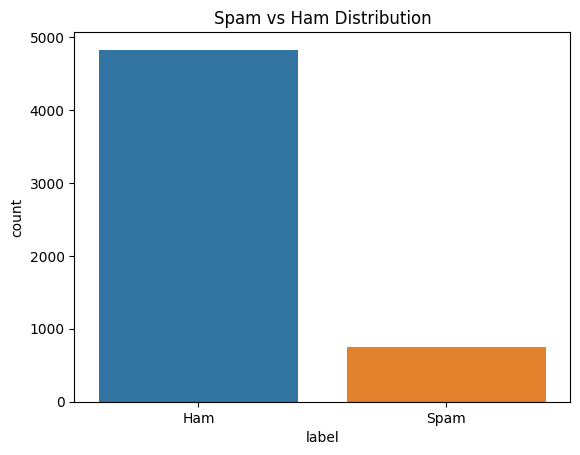

In [6]:
#distribution
sns.countplot(x='label', data=df)
plt.title('Spam vs Ham Distribution')
plt.xticks([0,1], ['Ham', 'Spam'])
plt.show()





In [7]:


X = df['text']
y = df['label']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text into TF-IDF features
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [8]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict on test set
y_pred = model.predict(X_test_tfidf)


In [9]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.967713004484305

Confusion Matrix:
 [[966   0]
 [ 36 113]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.76      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [10]:
def predict_spam(message):
    vec = tfidf.transform([message])
    pred = model.predict(vec)[0]
    return "Spam" if pred == 1 else "Ham"

# Try it
print(predict_spam("Free entry in 2 a wkly comp to win cash prizes"))
print(predict_spam("Hey I will call you later, in class right now"))


Spam
Ham


In [11]:
import joblib

# Save model and vectorizer
joblib.dump(model, 'spam_detector_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']